# Regularizacion

In [1]:
TAM_IMG = 128
BATCH_SIZE_LOADER = 32
COLOR_MODE = 'rgb'

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation sin criterio
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,          # Escalado de píxeles al rango [0, 1]
)

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

2024-11-23 21:07:27.418796: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1732392447.430550   92585 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1732392447.433870   92585 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-23 21:07:27.446840: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Directorios
train_dir = "../Celebrity_Faces_Dataset_Duplicada_SPLITTED/train"
val_dir = "../Celebrity_Faces_Dataset_Duplicada_SPLITTED/val"

COLOR_MODE = 'rgb'
# Crear generadores de datos
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(TAM_IMG, TAM_IMG),
    batch_size=BATCH_SIZE_LOADER,
    color_mode=COLOR_MODE,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(TAM_IMG, TAM_IMG),
    batch_size=BATCH_SIZE_LOADER,
    color_mode=COLOR_MODE,
    class_mode='categorical'
)

test_dir = "../Celebrity_Faces_Dataset_Duplicada_SPLITTED/test"

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(TAM_IMG, TAM_IMG),
    batch_size=BATCH_SIZE_LOADER,
    class_mode='categorical',
    shuffle=False
)


Found 1197 images belonging to 17 classes.
Found 341 images belonging to 17 classes.
Found 173 images belonging to 17 classes.


### Modelo 

Usaré callbacks para quedarme con el mejor modelo

In [4]:
# Early stopping
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.regularizers import l2

Manual

In [6]:
# import random

# input_shape = (TAM_IMG, TAM_IMG, 3)
# neuronas_salida = len(train_data.class_indices)
# filtros_conv = 32
# neuronas_capa_densa = 128
# kernel_size = (5, 5)
# padding_tipo = 'valid'

# dropout_max = 0.9
# dropout_min = 0.1

# mejorDropout_modelo = Sequential()

# bestAcc_Dropout = 0
# bestDropout = 0

# # Test dropout
# for i in range (1, 7):
    
#     # Modelo basico + dropout Varios
#     model_4_1 = Sequential([
#         Input(shape=input_shape),

#         Conv2D(filtros_conv, kernel_size, activation='relu', padding=padding_tipo),
#         MaxPooling2D((2, 2)),

#         Conv2D(filtros_conv*2, kernel_size, activation='relu', padding=padding_tipo),
#         MaxPooling2D((2, 2)),
        
#         Flatten(),
#         Dense(neuronas_capa_densa, activation='relu'),
#         Dropout(dropout_arr[i]),
#         Dense(neuronas_salida, activation='softmax')
#     ])

#     model_4_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#     history_4_1 = model_4_1.fit(
#         train_data,
#         validation_data=val_data,
#         epochs=100,
#         callbacks=[early_stopping],
#         verbose=0
#     )

#     _, acc = model_4_1.evaluate(test_data)
#     print(f"Dropout: {dropout_arr[i]}")
#     print(f"Accuracy: {acc}")
#     if acc > bestAcc_Dropout:
#         bestDropout = dropout_arr[i]
#         bestAcc_Dropout = acc
#         mejorDropout_modelo = model_4_1

#     # Borramos el modelo para liberar memoria
#     del model_4_1
    
    
# print(f"Mejor Dropout: {bestDropout}")
# print(f"Mejor Acc: {bestAcc_Dropout}")




In [7]:
import random

input_shape = (TAM_IMG, TAM_IMG, 3)
neuronas_salida = len(train_data.class_indices)
filtros_conv = 32
neuronas_capa_densa = 128
kernel_size = (5, 5)
padding_tipo = 'valid'

dropout_max = 0.9
dropout_min = 0.1

mejorDropout_modelo = Sequential()

bestAcc_Dropout = 0
bestDropout = 0
dropout_results = []

for i in range(0, 100):
    dropout_rate = random.uniform(dropout_min, dropout_max)
    
    model_4_1 = Sequential([
        Input(shape=input_shape),

        Conv2D(filtros_conv, kernel_size, activation='relu', padding=padding_tipo),
        MaxPooling2D((2, 2)),

        Conv2D(filtros_conv*2, kernel_size, activation='relu', padding=padding_tipo),
        MaxPooling2D((2, 2)),
        
        Flatten(),
        Dense(neuronas_capa_densa, activation='relu'),
        Dropout(dropout_rate),
        Dense(neuronas_salida, activation='softmax')
    ])

    model_4_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history_4_1 = model_4_1.fit(
        train_data,
        validation_data=val_data,
        epochs=100,
        callbacks=[early_stopping],
        verbose=0
    )

    _, acc = model_4_1.evaluate(test_data)
    print(f"Dropout: {dropout_rate}")
    print(f"Accuracy: {acc}")
    
    dropout_results.append((dropout_rate, acc))
    
    if acc > bestAcc_Dropout:
        bestDropout = dropout_rate
        bestAcc_Dropout = acc
        mejorDropout_modelo = model_4_1

    del model_4_1

print(f"Mejor Dropout: {bestDropout}")
print(f"Mejor Acc: {bestAcc_Dropout}")

# Save results for plotting
dropout_rates, accuracies = zip(*dropout_results)

I0000 00:00:1732392449.895155   92585 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2246 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5
/home/david/miniconda3/envs/tf_wsl/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1732392451.230599   92768 service.cc:148] XLA service 0x7fa5640061f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732392451.230650   92768 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-11-23 21:07:31.251709: I tensorflow/compiler/mlir/tensorflow/util

5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1089 - loss: 2.7761

2024-11-23 21:07:55.555596: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[13,32,124,124]{3,2,1,0}, u8[0]{0}) custom-call(f32[13,3,128,128]{3,2,1,0}, f32[32,3,5,5]{3,2,1,0}, f32[32]{0}), window={size=5x5}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2024-11-23 21:07:55.614575: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[13,64,58,58]{3,2,1,0}, u8[0]{0}) custom-call(f32[13,32,62,62]{3,2,1,0}, f32[64,32,5,5]{3,2,1,0}, f32[64]{0}), window={size=5x5}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_con

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 0.1190 - loss: 2.7238
Dropout: 0.34196607417503344
Accuracy: 0.14450867474079132
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.0746 - loss: 2.8081 
Dropout: 0.5498532322074636
Accuracy: 0.08670520037412643
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.0384 - loss: 2.8336 
Dropout: 0.7851216852709407
Accuracy: 0.06936416029930115
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.1651 - loss: 2.5166
Dropout: 0.709633918276209
Accuracy: 0.19075144827365875
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.0454 - loss: 2.8336 
Dropout: 0.8281385191764667
Accuracy: 0.05780346691608429
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.1116 - loss: 2.8240
Dropout: 0.7496477260839309
Accuracy: 0.09826589375734329
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.0444 - loss: 2.8331 
Dropout: 0.6419638592106335
Accuracy: 0.06936416029930115
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.0589 - loss: 2.8087 
Dropout: 0.3

2024-11-23 21:14:51.650553: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:497] Allocator (GPU_0_bfc) ran out of memory trying to allocate 251.61MiB (rounded to 263832064)requested by op 
2024-11-23 21:14:51.650648: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1053] BFCAllocator dump for GPU_0_bfc
2024-11-23 21:14:51.650662: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1060] Bin (256): 	Total Chunks: 763, Chunks in use: 763. 190.8KiB allocated for chunks. 190.8KiB in use in bin. 34.1KiB client-requested in use in bin.
2024-11-23 21:14:51.650670: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1060] Bin (512): 	Total Chunks: 71, Chunks in use: 71. 35.8KiB allocated for chunks. 35.8KiB in use in bin. 35.5KiB client-requested in use in bin.
2024-11-23 21:14:51.650677: I external/local_xla/xla/tsl/framework/bfc_allocator.cc:1060] Bin (1024): 	Total Chunks: 1, Chunks in use: 1. 1.2KiB allocated for chunks. 1.2KiB in use in bin. 1.0KiB client-requested 

ResourceExhaustedError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/home/david/miniconda3/envs/tf_wsl/lib/python3.9/runpy.py", line 197, in _run_module_as_main

  File "/home/david/miniconda3/envs/tf_wsl/lib/python3.9/runpy.py", line 87, in _run_code

  File "/home/david/miniconda3/envs/tf_wsl/lib/python3.9/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/david/miniconda3/envs/tf_wsl/lib/python3.9/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/david/miniconda3/envs/tf_wsl/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/david/miniconda3/envs/tf_wsl/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/home/david/miniconda3/envs/tf_wsl/lib/python3.9/asyncio/base_events.py", line 601, in run_forever

  File "/home/david/miniconda3/envs/tf_wsl/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once

  File "/home/david/miniconda3/envs/tf_wsl/lib/python3.9/asyncio/events.py", line 80, in _run

  File "/home/david/miniconda3/envs/tf_wsl/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/david/miniconda3/envs/tf_wsl/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/david/miniconda3/envs/tf_wsl/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/david/miniconda3/envs/tf_wsl/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/david/miniconda3/envs/tf_wsl/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/david/miniconda3/envs/tf_wsl/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/david/miniconda3/envs/tf_wsl/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/david/miniconda3/envs/tf_wsl/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell

  File "/home/david/miniconda3/envs/tf_wsl/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell

  File "/home/david/miniconda3/envs/tf_wsl/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/david/miniconda3/envs/tf_wsl/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async

  File "/home/david/miniconda3/envs/tf_wsl/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes

  File "/home/david/miniconda3/envs/tf_wsl/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code

  File "/tmp/ipykernel_92585/2032184196.py", line 39, in <module>

  File "/home/david/miniconda3/envs/tf_wsl/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/home/david/miniconda3/envs/tf_wsl/lib/python3.9/site-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/home/david/miniconda3/envs/tf_wsl/lib/python3.9/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

Out of memory while trying to allocate 263832032 bytes.
	 [[{{node StatefulPartitionedCall}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_one_step_on_iterator_72443]

In [ ]:
# del mejorDropout_modelo

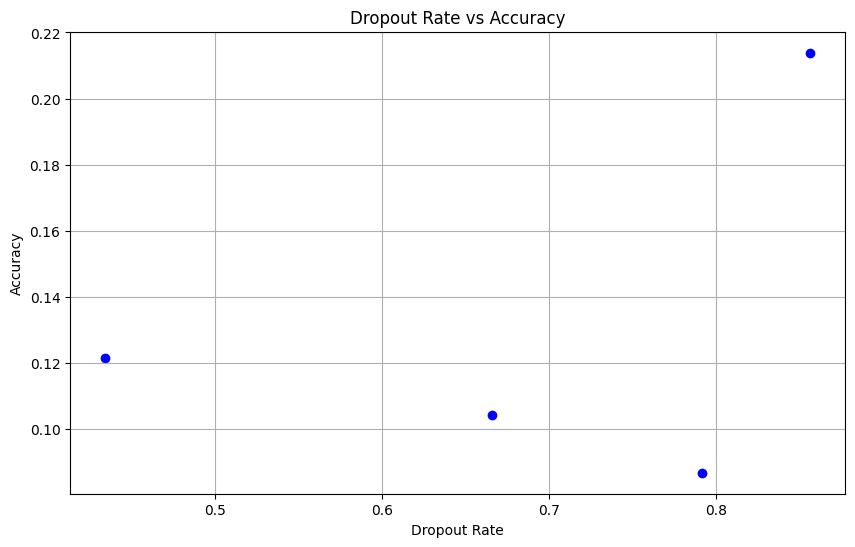

In [ ]:
import matplotlib.pyplot as plt

# Crear el diagrama de puntos
plt.figure(figsize=(10, 6))
plt.scatter(dropout_rates, accuracies, color='blue')
plt.xlabel('Dropout Rate')
plt.ylabel('Accuracy')
plt.title('Dropout Rate vs Accuracy')
plt.grid(True)
plt.show()

In [ ]:
import gc
gc.collect()

3334